# Set and Import

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
%run ../lib/load.py

In [19]:
import scipy.io as scio
import os

In [2]:
conda install keras

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
conda install tensorflow

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow
import keras

Using TensorFlow backend.


In [3]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D,Dropout
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json
from keras import backend as K
from keras import regularizers
from keras.regularizers import l2

In [20]:
# pwd = os.path.dirname(os.path.dirname(os.getcwd()))
# checkpoint_wd = os.path.join(pwd, "output", "checkpoint")
# pwd

'/Users/zhaoziqin/Desktop/Applied Data Science'

In [4]:
path = '/Users/zhaoziqin/Desktop/train_set/'
data = load.load_data(path+'label.csv')
points_path = '/Users/zhaoziqin/Desktop/train_set/points/'
X = load.load_points(points_path,data)
y= data['emotion_idx'].to_numpy()

--- 15.269209861755371 seconds ---


In [12]:
from sklearn.model_selection import train_test_split
data_unsplit = pd.read_csv('/Users/zhaoziqin/Desktop/data_unsplit.csv')
X=data_unsplit.iloc[:,1:-1]
y=data_unsplit["emotion_idx"]
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=123)

# Deep learning：Neural Networks

### Fitting more times

In [14]:
#set predictors
from keras.utils import to_categorical
Y = to_categorical(y)
Y = Y[:,1:]

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=123)

In [16]:
from keras.layers import Dense, Activation, Flatten, Input,Dropout
from keras.layers import BatchNormalization
from keras.models import Model
from keras import initializers
input_shape = [6006] 
input_layer = Input(input_shape)
x = BatchNormalization()(input_layer) 
x = Dense(96,activation='relu',kernel_initializer=initializers.glorot_normal(seed=None))(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x) 
x = Dense(16,activation='relu',kernel_initializer=initializers.glorot_normal(seed=None))(x)
x = Dropout(0.5)(x)
output_layer = Dense(22,activation='softmax',kernel_initializer=initializers.glorot_normal(seed=None))(x) 
model = Model(input_layer,output_layer)

In [17]:
from keras.optimizers import Adam
start_time = time.time()
model.compile(loss='categorical_crossentropy',optimizer = Adam(lr=0.01),metrics=['accuracy'])
model.fit(X_train,y_train, validation_data=[X_test,y_test],epochs=50, batch_size=300)
# print('lr=0.01, train complete')
model.compile(loss='categorical_crossentropy',optimizer = Adam(lr=0.001),metrics=['accuracy'])
model.fit(X_train,y_train,validation_data=[X_test,y_test],epochs=200, batch_size=250)
# print('lr=0.001, train complete')
model.compile(loss='categorical_crossentropy',optimizer = Adam(lr=0.0001),metrics=['accuracy'])
model.fit(X_train,y_train,validation_data=[X_test,y_test],epochs=200, batch_size=200)
# print('lr=0.0001, train complete')
model.compile(loss='categorical_crossentropy',optimizer = Adam(lr=0.00001),metrics=['accuracy'])
model.fit(X_train,y_train,validation_data=[X_test,y_test],epochs=200, batch_size=200)
# print('lr=0.000001, train complete')
model.compile(loss='categorical_crossentropy',optimizer = Adam(lr=0.001),metrics=['accuracy'])
model.fit(X_train,y_train,validation_data=[X_test,y_test],epochs=200, batch_size=250)
# print('lr=0.001, train complete')
model.compile(loss='categorical_crossentropy',optimizer = Adam(lr=0.0001),metrics=['accuracy'])
model.fit(X_train,y_train,validation_data=[X_test,y_test],epochs=200, batch_size=200)
# print('lr=0.0001, train complete')
model.compile(loss='categorical_crossentropy',optimizer = Adam(lr=0.00001),metrics=['accuracy'])
model.fit(X_train,y_train,validation_data=[X_test,y_test],epochs=50, batch_size=200)
# print('lr=0.0001, train complete')
print("--- %s seconds ---" % (time.time() - start_time))

Train on 2000 samples, validate on 500 samples
Epoch 1/50
2000/2000 [==============================] - 6s 3ms/step - loss: 3.4637 - accuracy: 0.0610 - val_loss: 67.7700 - val_accuracy: 0.0420
Epoch 2/50
2000/2000 [==============================] - 1s 542us/step - loss: 3.1020 - accuracy: 0.0725 - val_loss: 4.7246 - val_accuracy: 0.0640
Epoch 3/50
2000/2000 [==============================] - 1s 529us/step - loss: 3.0335 - accuracy: 0.0900 - val_loss: 3.7354 - val_accuracy: 0.0360
Epoch 4/50
2000/2000 [==============================] - 1s 524us/step - loss: 2.9648 - accuracy: 0.1060 - val_loss: 4.2387 - val_accuracy: 0.0360
Epoch 5/50
2000/2000 [==============================] - 1s 519us/step - loss: 2.8940 - accuracy: 0.1175 - val_loss: 2.9861 - val_accuracy: 0.0440
Epoch 6/50
2000/2000 [==============================] - 1s 530us/step - loss: 2.8024 - accuracy: 0.1345 - val_loss: 2.9994 - val_accuracy: 0.0780
Epoch 7/50
2000/2000 [==============================] - 1s 617us/step - loss: 

2000/2000 [==============================] - 1s 549us/step - loss: 1.4476 - accuracy: 0.4595 - val_loss: 1.4831 - val_accuracy: 0.4760
Epoch 62/200
2000/2000 [==============================] - 1s 564us/step - loss: 1.4591 - accuracy: 0.4425 - val_loss: 1.4834 - val_accuracy: 0.4700
Epoch 63/200
2000/2000 [==============================] - 2s 770us/step - loss: 1.4421 - accuracy: 0.4470 - val_loss: 1.4823 - val_accuracy: 0.4720
Epoch 64/200
2000/2000 [==============================] - 1s 584us/step - loss: 1.4472 - accuracy: 0.4610 - val_loss: 1.4802 - val_accuracy: 0.4800
Epoch 65/200
2000/2000 [==============================] - 1s 584us/step - loss: 1.4507 - accuracy: 0.4555 - val_loss: 1.4807 - val_accuracy: 0.4820
Epoch 66/200
2000/2000 [==============================] - 1s 586us/step - loss: 1.4470 - accuracy: 0.4510 - val_loss: 1.4791 - val_accuracy: 0.4780
Epoch 67/200
2000/2000 [==============================] - 1s 562us/step - loss: 1.4467 - accuracy: 0.4620 - val_loss: 1.4808 

2000/2000 [==============================] - 1s 532us/step - loss: 1.2704 - accuracy: 0.5125 - val_loss: 1.5693 - val_accuracy: 0.4820
Epoch 172/200
2000/2000 [==============================] - 1s 531us/step - loss: 1.3116 - accuracy: 0.5195 - val_loss: 1.5772 - val_accuracy: 0.4760
Epoch 173/200
2000/2000 [==============================] - 1s 540us/step - loss: 1.2746 - accuracy: 0.5060 - val_loss: 1.5816 - val_accuracy: 0.4860
Epoch 174/200
2000/2000 [==============================] - 1s 527us/step - loss: 1.2972 - accuracy: 0.5075 - val_loss: 1.5720 - val_accuracy: 0.4800
Epoch 175/200
2000/2000 [==============================] - 1s 523us/step - loss: 1.2561 - accuracy: 0.5320 - val_loss: 1.5597 - val_accuracy: 0.4880
Epoch 176/200
2000/2000 [==============================] - 1s 528us/step - loss: 1.2633 - accuracy: 0.5250 - val_loss: 1.5667 - val_accuracy: 0.4860
Epoch 177/200
2000/2000 [==============================] - 1s 524us/step - loss: 1.2558 - accuracy: 0.5180 - val_loss: 1

2000/2000 [==============================] - 1s 563us/step - loss: 1.2145 - accuracy: 0.5350 - val_loss: 1.6030 - val_accuracy: 0.4980
Epoch 27/200
2000/2000 [==============================] - 1s 557us/step - loss: 1.2094 - accuracy: 0.5290 - val_loss: 1.6027 - val_accuracy: 0.5000
Epoch 28/200
2000/2000 [==============================] - 1s 573us/step - loss: 1.2568 - accuracy: 0.5275 - val_loss: 1.6031 - val_accuracy: 0.4980
Epoch 29/200
2000/2000 [==============================] - 1s 583us/step - loss: 1.2506 - accuracy: 0.5145 - val_loss: 1.6033 - val_accuracy: 0.5020
Epoch 30/200
2000/2000 [==============================] - 1s 634us/step - loss: 1.2317 - accuracy: 0.5220 - val_loss: 1.6042 - val_accuracy: 0.5020
Epoch 31/200
2000/2000 [==============================] - 1s 612us/step - loss: 1.2505 - accuracy: 0.5260 - val_loss: 1.6035 - val_accuracy: 0.4980
Epoch 32/200
2000/2000 [==============================] - 2s 799us/step - loss: 1.2358 - accuracy: 0.5400 - val_loss: 1.6036 

2000/2000 [==============================] - 1s 566us/step - loss: 1.2166 - accuracy: 0.5425 - val_loss: 1.6123 - val_accuracy: 0.5140
Epoch 137/200
2000/2000 [==============================] - 1s 557us/step - loss: 1.2567 - accuracy: 0.5250 - val_loss: 1.6126 - val_accuracy: 0.5100
Epoch 138/200
2000/2000 [==============================] - 1s 553us/step - loss: 1.2057 - accuracy: 0.5495 - val_loss: 1.6121 - val_accuracy: 0.5040
Epoch 139/200
2000/2000 [==============================] - 1s 555us/step - loss: 1.2156 - accuracy: 0.5350 - val_loss: 1.6119 - val_accuracy: 0.5040
Epoch 140/200
2000/2000 [==============================] - 1s 557us/step - loss: 1.2019 - accuracy: 0.5460 - val_loss: 1.6120 - val_accuracy: 0.5020
Epoch 141/200
2000/2000 [==============================] - 1s 559us/step - loss: 1.2277 - accuracy: 0.5290 - val_loss: 1.6137 - val_accuracy: 0.4980
Epoch 142/200
2000/2000 [==============================] - 1s 556us/step - loss: 1.2339 - accuracy: 0.5305 - val_loss: 1

2000/2000 [==============================] - 1s 564us/step - loss: 1.2254 - accuracy: 0.5185 - val_loss: 1.6343 - val_accuracy: 0.5060
Epoch 192/200
2000/2000 [==============================] - 1s 558us/step - loss: 1.2111 - accuracy: 0.5305 - val_loss: 1.6303 - val_accuracy: 0.5040
Epoch 193/200
2000/2000 [==============================] - 1s 557us/step - loss: 1.1749 - accuracy: 0.5565 - val_loss: 1.6297 - val_accuracy: 0.5000
Epoch 194/200
2000/2000 [==============================] - 1s 553us/step - loss: 1.2170 - accuracy: 0.5275 - val_loss: 1.6274 - val_accuracy: 0.5000
Epoch 195/200
2000/2000 [==============================] - 1s 555us/step - loss: 1.1906 - accuracy: 0.5305 - val_loss: 1.6259 - val_accuracy: 0.5040
Epoch 196/200
2000/2000 [==============================] - 1s 557us/step - loss: 1.2271 - accuracy: 0.5370 - val_loss: 1.6253 - val_accuracy: 0.5040
Epoch 197/200
2000/2000 [==============================] - 1s 570us/step - loss: 1.1855 - accuracy: 0.5375 - val_loss: 1

2000/2000 [==============================] - 1s 591us/step - loss: 1.1881 - accuracy: 0.5425 - val_loss: 1.6303 - val_accuracy: 0.5100
Epoch 102/200
2000/2000 [==============================] - 1s 560us/step - loss: 1.1934 - accuracy: 0.5350 - val_loss: 1.6302 - val_accuracy: 0.5080
Epoch 103/200
2000/2000 [==============================] - 1s 558us/step - loss: 1.2079 - accuracy: 0.5385 - val_loss: 1.6301 - val_accuracy: 0.5080
Epoch 104/200
2000/2000 [==============================] - 1s 564us/step - loss: 1.1435 - accuracy: 0.5770 - val_loss: 1.6302 - val_accuracy: 0.5060
Epoch 105/200
2000/2000 [==============================] - 1s 559us/step - loss: 1.2038 - accuracy: 0.5400 - val_loss: 1.6305 - val_accuracy: 0.5060
Epoch 106/200
2000/2000 [==============================] - 1s 563us/step - loss: 1.1810 - accuracy: 0.5580 - val_loss: 1.6305 - val_accuracy: 0.5060
Epoch 107/200
2000/2000 [==============================] - 1s 558us/step - loss: 1.2084 - accuracy: 0.5335 - val_loss: 1

2000/2000 [==============================] - 1s 558us/step - loss: 1.2439 - accuracy: 0.5230 - val_loss: 1.6284 - val_accuracy: 0.5060
Epoch 157/200
2000/2000 [==============================] - 1s 560us/step - loss: 1.1986 - accuracy: 0.5385 - val_loss: 1.6291 - val_accuracy: 0.5040
Epoch 158/200
2000/2000 [==============================] - 1s 586us/step - loss: 1.1888 - accuracy: 0.5540 - val_loss: 1.6296 - val_accuracy: 0.5040
Epoch 159/200
2000/2000 [==============================] - 1s 558us/step - loss: 1.1841 - accuracy: 0.5445 - val_loss: 1.6294 - val_accuracy: 0.5040
Epoch 160/200
2000/2000 [==============================] - 1s 551us/step - loss: 1.1810 - accuracy: 0.5425 - val_loss: 1.6293 - val_accuracy: 0.5060
Epoch 161/200
2000/2000 [==============================] - 1s 554us/step - loss: 1.1931 - accuracy: 0.5425 - val_loss: 1.6292 - val_accuracy: 0.5040
Epoch 162/200
2000/2000 [==============================] - 1s 567us/step - loss: 1.1741 - accuracy: 0.5450 - val_loss: 1

Epoch 11/200
2000/2000 [==============================] - 2s 802us/step - loss: 1.2116 - accuracy: 0.5485 - val_loss: 1.6358 - val_accuracy: 0.5260
Epoch 12/200
2000/2000 [==============================] - 1s 562us/step - loss: 1.1832 - accuracy: 0.5540 - val_loss: 1.6331 - val_accuracy: 0.5160
Epoch 13/200
2000/2000 [==============================] - 1s 567us/step - loss: 1.2044 - accuracy: 0.5440 - val_loss: 1.6416 - val_accuracy: 0.5180
Epoch 14/200
2000/2000 [==============================] - 1s 599us/step - loss: 1.1904 - accuracy: 0.5545 - val_loss: 1.6421 - val_accuracy: 0.5160
Epoch 15/200
2000/2000 [==============================] - 1s 666us/step - loss: 1.2283 - accuracy: 0.5230 - val_loss: 1.6346 - val_accuracy: 0.5120
Epoch 16/200
2000/2000 [==============================] - 1s 589us/step - loss: 1.1998 - accuracy: 0.5555 - val_loss: 1.6410 - val_accuracy: 0.5200
Epoch 17/200
2000/2000 [==============================] - 1s 640us/step - loss: 1.1836 - accuracy: 0.5415 - val_

2000/2000 [==============================] - 1s 628us/step - loss: 1.1326 - accuracy: 0.5615 - val_loss: 1.7803 - val_accuracy: 0.5080
Epoch 122/200
2000/2000 [==============================] - 1s 543us/step - loss: 1.1466 - accuracy: 0.5670 - val_loss: 1.7799 - val_accuracy: 0.5040
Epoch 123/200
2000/2000 [==============================] - 1s 553us/step - loss: 1.0998 - accuracy: 0.5870 - val_loss: 1.7882 - val_accuracy: 0.5060
Epoch 124/200
2000/2000 [==============================] - 1s 523us/step - loss: 1.1695 - accuracy: 0.5630 - val_loss: 1.7983 - val_accuracy: 0.5040
Epoch 125/200
2000/2000 [==============================] - 1s 532us/step - loss: 1.1410 - accuracy: 0.5550 - val_loss: 1.8114 - val_accuracy: 0.4980
Epoch 126/200
2000/2000 [==============================] - 1s 531us/step - loss: 1.1137 - accuracy: 0.5755 - val_loss: 1.7953 - val_accuracy: 0.4960
Epoch 127/200
2000/2000 [==============================] - 1s 534us/step - loss: 1.1177 - accuracy: 0.5700 - val_loss: 1

2000/2000 [==============================] - 1s 544us/step - loss: 1.1165 - accuracy: 0.5695 - val_loss: 1.8214 - val_accuracy: 0.5100
Epoch 177/200
2000/2000 [==============================] - 1s 532us/step - loss: 1.0899 - accuracy: 0.5850 - val_loss: 1.7960 - val_accuracy: 0.5120
Epoch 178/200
2000/2000 [==============================] - 1s 538us/step - loss: 1.1011 - accuracy: 0.5785 - val_loss: 1.8202 - val_accuracy: 0.5300
Epoch 179/200
2000/2000 [==============================] - 1s 523us/step - loss: 1.0889 - accuracy: 0.5885 - val_loss: 1.8280 - val_accuracy: 0.5180
Epoch 180/200
2000/2000 [==============================] - 1s 528us/step - loss: 1.1254 - accuracy: 0.5790 - val_loss: 1.8340 - val_accuracy: 0.5160
Epoch 181/200
2000/2000 [==============================] - 1s 531us/step - loss: 1.0680 - accuracy: 0.5915 - val_loss: 1.8179 - val_accuracy: 0.5140
Epoch 182/200
2000/2000 [==============================] - 1s 533us/step - loss: 1.1151 - accuracy: 0.5855 - val_loss: 1

2000/2000 [==============================] - 1s 637us/step - loss: 1.0659 - accuracy: 0.5820 - val_loss: 1.8743 - val_accuracy: 0.5220
Epoch 32/200
2000/2000 [==============================] - 1s 568us/step - loss: 1.0704 - accuracy: 0.5935 - val_loss: 1.8748 - val_accuracy: 0.5160
Epoch 33/200
2000/2000 [==============================] - 1s 625us/step - loss: 1.0492 - accuracy: 0.5985 - val_loss: 1.8740 - val_accuracy: 0.5140
Epoch 34/200
2000/2000 [==============================] - 1s 603us/step - loss: 1.0294 - accuracy: 0.6080 - val_loss: 1.8752 - val_accuracy: 0.5160
Epoch 35/200
2000/2000 [==============================] - 1s 563us/step - loss: 1.0622 - accuracy: 0.5955 - val_loss: 1.8775 - val_accuracy: 0.5140
Epoch 36/200
2000/2000 [==============================] - 1s 570us/step - loss: 1.0759 - accuracy: 0.5805 - val_loss: 1.8789 - val_accuracy: 0.5160
Epoch 37/200
2000/2000 [==============================] - 1s 587us/step - loss: 1.0759 - accuracy: 0.5910 - val_loss: 1.8778 

2000/2000 [==============================] - 1s 564us/step - loss: 1.0488 - accuracy: 0.5960 - val_loss: 1.9167 - val_accuracy: 0.5260
Epoch 142/200
2000/2000 [==============================] - 1s 562us/step - loss: 1.0968 - accuracy: 0.5850 - val_loss: 1.9154 - val_accuracy: 0.5220
Epoch 143/200
2000/2000 [==============================] - 1s 565us/step - loss: 1.0640 - accuracy: 0.5895 - val_loss: 1.9163 - val_accuracy: 0.5200
Epoch 144/200
2000/2000 [==============================] - 1s 558us/step - loss: 1.0560 - accuracy: 0.6090 - val_loss: 1.9187 - val_accuracy: 0.5200
Epoch 145/200
2000/2000 [==============================] - 1s 559us/step - loss: 1.0428 - accuracy: 0.6095 - val_loss: 1.9232 - val_accuracy: 0.5200
Epoch 146/200
2000/2000 [==============================] - 1s 567us/step - loss: 1.0660 - accuracy: 0.5900 - val_loss: 1.9205 - val_accuracy: 0.5140
Epoch 147/200
2000/2000 [==============================] - 1s 553us/step - loss: 1.0611 - accuracy: 0.5950 - val_loss: 1

2000/2000 [==============================] - 1s 563us/step - loss: 1.0295 - accuracy: 0.6290 - val_loss: 1.9158 - val_accuracy: 0.5160
Epoch 197/200
2000/2000 [==============================] - 1s 569us/step - loss: 1.0700 - accuracy: 0.6105 - val_loss: 1.9141 - val_accuracy: 0.5120
Epoch 198/200
2000/2000 [==============================] - 1s 556us/step - loss: 1.0262 - accuracy: 0.6040 - val_loss: 1.9128 - val_accuracy: 0.5180
Epoch 199/200
2000/2000 [==============================] - 1s 561us/step - loss: 1.0371 - accuracy: 0.6135 - val_loss: 1.9120 - val_accuracy: 0.5160
Epoch 200/200
2000/2000 [==============================] - 1s 587us/step - loss: 1.0624 - accuracy: 0.5985 - val_loss: 1.9120 - val_accuracy: 0.5160
Train on 2000 samples, validate on 500 samples
Epoch 1/50
2000/2000 [==============================] - 5s 2ms/step - loss: 1.0309 - accuracy: 0.6210 - val_loss: 1.9143 - val_accuracy: 0.5160
Epoch 2/50
2000/2000 [==============================] - 1s 559us/step - loss: 

In [19]:
a=np.argmax(model.predict(X_train), axis=1)
accuracy_score(np.argmax(y_train, axis=1), a) 
pred=np.argmax(model.predict(X_test), axis=1)
accuracy_score(np.argmax(y_test, axis=1), pred)

0.514

### model 2

In [13]:
import math
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import keras
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Input, Dropout
from keras.layers import BatchNormalization
from keras.models import Model
from keras import initializers
from keras.optimizers import Adam

In [14]:
from keras.utils import to_categorical
Y = to_categorical(y)
Y = Y[:,1:]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=123)

In [15]:
input_shape = [6006] 
input_layer = Input(input_shape)
x = BatchNormalization(momentum = 0.88)(input_layer) 
x = Dense(22*10,activation='relu',kernel_initializer=initializers.glorot_normal(seed=6))(x)
x = Dropout(0.25)(x)
x = BatchNormalization()(x) 
x = Dense(22*8,activation='relu',kernel_initializer=initializers.glorot_normal(seed=6))(x)
x = Dropout(0.25)(x)
x = Dense(22*4,activation='relu',kernel_initializer=initializers.glorot_normal(seed=6))(x)
x = Dropout(0.25)(x)
x = Dense(22*2,activation='relu',kernel_initializer=initializers.glorot_normal(seed=6))(x)
output_layer = Dense(22,activation='softmax',kernel_initializer=initializers.glorot_normal(seed=6))(x) 
model = Model(input_layer,output_layer)

In [16]:
start_time = time.time()
model.compile(loss='categorical_crossentropy',optimizer = Adam(lr=0.001),metrics=['accuracy'])
model_nn = model.fit(X_train,y_train,epochs=200)
print("training  model takes %s seconds" % round((time.time() - start_time),3))

Epoch 1/200
2000/2000 [==============================] - 7s 4ms/step - loss: 3.0293 - accuracy: 0.0885
Epoch 2/200
2000/2000 [==============================] - 4s 2ms/step - loss: 2.7066 - accuracy: 0.1700
Epoch 3/200
2000/2000 [==============================] - 4s 2ms/step - loss: 2.3706 - accuracy: 0.2430
Epoch 4/200
2000/2000 [==============================] - 4s 2ms/step - loss: 2.1653 - accuracy: 0.2820
Epoch 5/200
2000/2000 [==============================] - 4s 2ms/step - loss: 2.0189 - accuracy: 0.3365
Epoch 6/200
2000/2000 [==============================] - 4s 2ms/step - loss: 1.9310 - accuracy: 0.3540
Epoch 7/200
2000/2000 [==============================] - 4s 2ms/step - loss: 1.8065 - accuracy: 0.3910
Epoch 8/200
2000/2000 [==============================] - 4s 2ms/step - loss: 1.7376 - accuracy: 0.4095
Epoch 9/200
2000/2000 [==============================] - 4s 2ms/step - loss: 1.6693 - accuracy: 0.4280
Epoch 10/200
2000/2000 [==============================] - 4s 2ms/step - l

2000/2000 [==============================] - 4s 2ms/step - loss: 0.2452 - accuracy: 0.9235
Epoch 158/200
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2469 - accuracy: 0.9235
Epoch 159/200
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2618 - accuracy: 0.9120
Epoch 160/200
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2484 - accuracy: 0.9225
Epoch 161/200
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9210
Epoch 162/200
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2585 - accuracy: 0.9145
Epoch 163/200
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2343 - accuracy: 0.9210
Epoch 164/200
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2176 - accuracy: 0.9275
Epoch 165/200
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2245 - accuracy: 0.9230
Epoch 166/200
2000/2000 [==============================] - 4s 2ms/ste

Text(0.5, 1.0, 'Accuracy Curves')

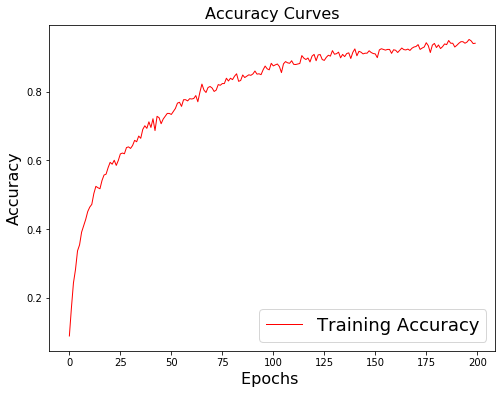

In [17]:
plt.figure(figsize=[8,6])
plt.plot(model_nn.history['accuracy'],'r',linewidth=1.0)
plt.legend(['Training Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [18]:
start = time.time()
pred = model.predict(X_test)
pred_list = [] 
for i in range(len(pred)):
    arr = pred[i]
    idx = np.argwhere(arr == np.max(arr))
    pred_list.append(idx[0][0])
tst_labl = np.argmax(y_test, axis=-1)
accuracy = accuracy_score(pred_list, tst_labl)
print("Test accuracy is %s percent" % round(accuracy*100,3))
print("testing model takes %s seconds" % round((time.time() - start),3))

Test accuracy is 55.2 percent
testing model takes 0.888 seconds
